# Import libraries

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


# Load Dataset

In [3]:
# read datasdet using pandas
df = pd.read_excel(r"C:\Users\admin\Desktop\next hike\projrct -4\Processed_Flipdata.xlsx")

In [4]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 12 columns]

Exploratory Data Analysis

In [5]:
df.shape

(541, 12)

In [6]:
df.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


# Data Preprocessing

In [8]:
# print the data types of all the columns in your DataFrame
print(df.dtypes)

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object


In [9]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

convert object into integer

In [10]:
# Assuming df is your DataFrame
df['Rear Camera'] = df['Rear Camera'].astype(str)

# Extract numeric values and convert to int64
df['Rear Camera'] = df['Rear Camera'].str.extract('(\d+)').astype('int64', errors='ignore')


In [11]:
df.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

   Rear Camera Front Camera  AI Lens  Mobile Height  \
0           13          5MP        1          16.76   
1           13          5MP        1          16.76   
2           50         16MP        0          16.64   
3            8          5MP        0          16.56   
4           50          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

In [12]:
# Assuming df is your DataFrame
df['Front Camera'] = df['Front Camera'].astype(str)

# Extract numeric values and convert to int64
df['Front Camera'] = df['Front Camera'].str.extract('(\d+)').astype('int64', errors='ignore')


In [13]:
df.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

   Rear Camera  Front Camera  AI Lens  Mobile Height  \
0           13             5        1          16.76   
1           13             5        1          16.76   
2           50            16        0          16.64   
3            8             5        0          16.56   
4           50             5        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int64  
 7   Front Camera   541 non-null    int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 50.8+ KB


In [15]:
df.info

<bound method DataFrame.info of      Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000

In [16]:
df.describe()

Unnamed: 0      Memory         RAM     Battery_  Rear Camera  \
count  541.000000  541.000000  541.000000   541.000000   541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    46.110906   
std    182.359185   60.600694    1.984923   780.148862    31.260416   
min      0.000000   16.000000    2.000000   800.000000     0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    13.000000   
50%    273.000000  128.000000    6.000000  5000.000000    50.000000   
75%    434.000000  128.000000    8.000000  5000.000000    50.000000   
max    642.000000  256.000000    8.000000  7000.000000   200.000000   

       Front Camera     AI Lens  Mobile Height         Prize  
count    541.000000  541.000000     541.000000    541.000000  
mean      11.992606    0.062847      16.431201  16228.375231  
std        9.053746    0.242911       2.523553  10793.588322  
min        0.000000    0.000000       4.500000    920.000000  
25%        5.000000    0.000000      16.510000   9290.000000  
50%        8.000000    0.000000      16.710000  13499.000000  
75%       16.000000    0.000000      16.940000  19280.000000  
max       60.000000    1.000000      41.940000  80999.000000

# Feature engineering

In [17]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

# Display unique values

In [18]:
df['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [19]:
df['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [20]:
df['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [21]:
df['Colour'].unique

<bound method Series.unique of 0         Night Black
1          Azure Blue
2        Mineral Gray
3          Royal Blue
4            Marigold
            ...      
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue
Name: Colour, Length: 541, dtype: object>

In [22]:
df['Processor_'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [23]:
df['Processor_'].unique

<bound method Series.unique of 0       Unisoc Spreadtrum SC9863A1
1       Unisoc Spreadtrum SC9863A1
2          Qualcomm Snapdragon 680
3               Mediatek Helio A22
4                              G37
                  ...             
536    Qualcomm Snapdragon 8 Gen 2
537                      Octa Core
538             MediaTek Helio G35
539        Exynos 1380, Octa Core 
540             Mediatek Helio G35
Name: Processor_, Length: 541, dtype: object>

# Handling categorical Data

In [24]:
# drop rows with missing values
df.dropna(inplace=True)

In [25]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76   
2             50            16        0          16.64   
3              8             5        0          16.56   
4             50             5        1          16.76   
..           ...           ...      ...            ...   
536           50            12        0          15.49   
537            5             2        0          12.70   
538           50             8        0          16.76   
539           50            32        0          16.26   
540           50             8        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 12 columns]

In [26]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [27]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76   
2             50            16        0          16.64   
3              8             5        0          16.56   
4             50             5        1          16.76   
..           ...           ...      ...            ...   
536           50            12        0          15.49   
537            5             2        0          12.70   
538           50             8        0          16.76   
539           50            32        0          16.26   
540           50             8        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 12 columns]

In [28]:
# Replace missing values for numeric column
df['Prize'].fillna(df['Prize'].mean(), inplace=True)

In [29]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76   
2             50            16        0          16.64   
3              8             5        0          16.56   
4             50             5        1          16.76   
..           ...           ...      ...            ...   
536           50            12        0          15.49   
537            5             2        0          12.70   
538           50             8        0          16.76   
539           50            32        0          16.26   
540           50             8        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 12 columns]

In [30]:
# Replace missing values for categorical column
df['Processor_'].fillna(df['Processor_'].mode()[0], inplace=True)

In [31]:
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

     Rear Camera  Front Camera  AI Lens  Mobile Height  \
0             13             5        1          16.76   
1             13             5        1          16.76   
2             50            16        0          16.64   
3              8             5        0          16.56   
4             50             5        1          16.76   
..           ...           ...      ...            ...   
536           50            12        0          15.49   
537            5             2        0          12.70   
538           50             8        0          16.76   
539           50            32        0          16.26   
540           50             8        0          16.66   

                      Processor_  Prize  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 12 columns]

## Ordinal Encoding 

In [32]:
# OrdinalEncoding method used to represent categorical variable as binary vector
encode_it = ['Colour', 'Model', 'Processor_']

In [33]:
encoder = OrdinalEncoder()

In [34]:
df[encode_it] = encoder.fit_transform(df[encode_it])

In [35]:
print(encode_it)

['Colour', 'Model', 'Processor_']


In [36]:
print(df)

     Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0             0   23.0   159.0      64    4      6000           13   
1             1   23.0    20.0      64    4      6000           13   
2             2   37.0   149.0     128    8      5000           50   
3             3   69.0   201.0      32    2      5000            8   
4             4   12.0   130.0     128    8      5000           50   
..          ...    ...     ...     ...  ...       ...          ...   
536         637  118.0    49.0     256    8      3900           50   
537         638   32.0    52.0      32    2      3100            5   
538         639  123.0   259.0      64    4      5000           50   
539         641  110.0    17.0     128    8      5000           50   
540         642   59.0   215.0     128    4      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0               5        1          16.76       113.0   7299  
1               5        1       

In [37]:
df.head()

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0           0   23.0   159.0      64    4      6000           13   
1           1   23.0    20.0      64    4      6000           13   
2           2   37.0   149.0     128    8      5000           50   
3           3   69.0   201.0      32    2      5000            8   
4           4   12.0   130.0     128    8      5000           50   

   Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0             5        1          16.76       113.0   7299  
1             5        1          16.76       113.0   7299  
2            16        0          16.64        75.0  11999  
3             5        0          16.56        56.0   5649  
4             5        1          16.76        14.0   8999

## Label Encoding

In [38]:
encode_it =  ['Model']

In [39]:
# Label Encoding of column model
encoder = LabelEncoder()

In [40]:
df['Model'] = df['Model'].values.ravel()

In [41]:
print(df)

     Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0             0   23.0   159.0      64    4      6000           13   
1             1   23.0    20.0      64    4      6000           13   
2             2   37.0   149.0     128    8      5000           50   
3             3   69.0   201.0      32    2      5000            8   
4             4   12.0   130.0     128    8      5000           50   
..          ...    ...     ...     ...  ...       ...          ...   
536         637  118.0    49.0     256    8      3900           50   
537         638   32.0    52.0      32    2      3100            5   
538         639  123.0   259.0      64    4      5000           50   
539         641  110.0    17.0     128    8      5000           50   
540         642   59.0   215.0     128    4      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0               5        1          16.76       113.0   7299  
1               5        1       

In [42]:
df.head()

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0           0   23.0   159.0      64    4      6000           13   
1           1   23.0    20.0      64    4      6000           13   
2           2   37.0   149.0     128    8      5000           50   
3           3   69.0   201.0      32    2      5000            8   
4           4   12.0   130.0     128    8      5000           50   

   Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0             5        1          16.76       113.0   7299  
1             5        1          16.76       113.0   7299  
2            16        0          16.64        75.0  11999  
3             5        0          16.56        56.0   5649  
4             5        1          16.76        14.0   8999

In [43]:
encode_it =  ['Processor_']

In [44]:
# Label Encoding of column Processor_
encoder = LabelEncoder()

In [45]:
df['Processor_'] = encoder.fit_transform(df['Processor_'])


In [46]:
print(df)

     Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0             0   23.0   159.0      64    4      6000           13   
1             1   23.0    20.0      64    4      6000           13   
2             2   37.0   149.0     128    8      5000           50   
3             3   69.0   201.0      32    2      5000            8   
4             4   12.0   130.0     128    8      5000           50   
..          ...    ...     ...     ...  ...       ...          ...   
536         637  118.0    49.0     256    8      3900           50   
537         638   32.0    52.0      32    2      3100            5   
538         639  123.0   259.0      64    4      5000           50   
539         641  110.0    17.0     128    8      5000           50   
540         642   59.0   215.0     128    4      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0               5        1          16.76         113   7299  
1               5        1       

In [47]:
df.head()

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0           0   23.0   159.0      64    4      6000           13   
1           1   23.0    20.0      64    4      6000           13   
2           2   37.0   149.0     128    8      5000           50   
3           3   69.0   201.0      32    2      5000            8   
4           4   12.0   130.0     128    8      5000           50   

   Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0             5        1          16.76         113   7299  
1             5        1          16.76         113   7299  
2            16        0          16.64          75  11999  
3             5        0          16.56          56   5649  
4             5        1          16.76          14   8999

# Most Affecting Features 

In [48]:
df.corr(numeric_only = True)['Prize'].sort_values(ascending = False)

Prize            1.000000
Memory           0.566660
Front Camera     0.532321
RAM              0.532024
Rear Camera      0.410367
Unnamed: 0       0.333940
Mobile Height    0.176009
Colour           0.038895
Battery_        -0.034297
Processor_      -0.050244
Model           -0.075163
AI Lens         -0.153691
Name: Prize, dtype: float64

## Memory affects Price through Scatter Plot

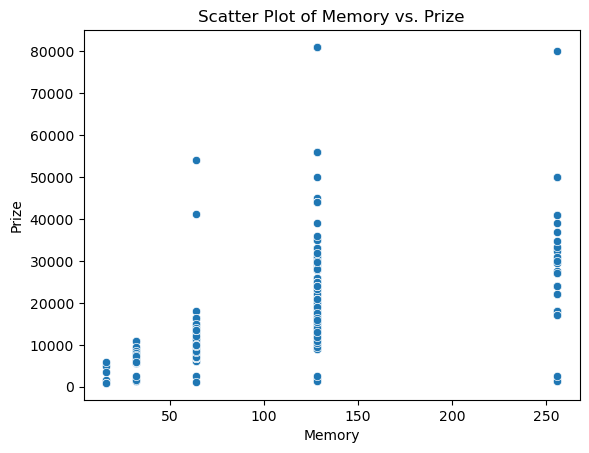

In [49]:
sns.scatterplot(x='Memory', y='Prize', data=df)
plt.title('Scatter Plot of Memory vs. Prize')
plt.show()

In [50]:
# Scatter plot shows memory  for  128 and 256  higher in demand which ultimately affects the price

In [51]:
outliers = df[(df['Memory'] < 250) & (df['Prize'] > 70000)]

In [52]:
outliers

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
493         576    2.0   144.0     128    6      4323           12   
520         614    2.0   193.0     128    3      4323           12   
525         621    2.0   230.0     128    4      4323           12   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
493            12        0          17.02          23  80999  
520            12        0          17.02           2  80999  
525            12        0          17.02         121  80999

## RAM Affects Prize through Scatter Plot

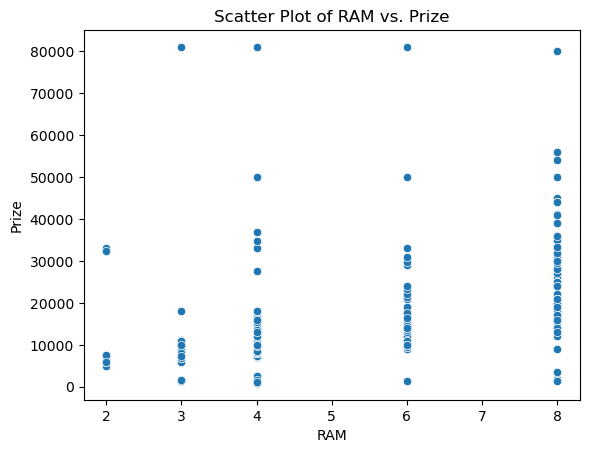

In [53]:
sns.scatterplot(x='RAM', y='Prize', data=df)
plt.title('Scatter Plot of RAM vs. Prize')
plt.show()

In [54]:
# Calculate the interquartile range
Q1 = df['Prize'].quantile(0.25)
Q3 = df['Prize'].quantile(0.75)
IQR = Q3 - Q1

In [55]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
# Identify outliers
outliers = (df['Prize'] < lower_bound) | (df['Prize'] > upper_bound)


In [57]:
print("Number of outliers:", outliers.sum())
print("Outlier values:", df['Prize'][outliers])

Number of outliers: 25
Outlier values: 222    49999
286    44999
305    34999
308    43999
309    43999
327    43999
396    36999
400    49999
416    55999
417    55999
419    34999
426    55999
455    38920
465    40999
474    41199
489    49999
493    80999
496    35999
515    40999
520    80999
522    34688
525    80999
532    53999
536    79999
539    38999
Name: Prize, dtype: int64


In [58]:
# Optionally, you can also create a new DataFrame with only the outliers
outliers_df = df[outliers]

In [59]:
outliers_df 

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
222         222  117.0   181.0     128    8      4500           50   
286         289  119.0   181.0     128    8      3300           12   
305         309   34.0    47.0     128    8      4400           50   
308         312    5.0   209.0     128    8      4300           64   
309         313    5.0    37.0     128    8      4300           64   
327         332    5.0   217.0     128    8      4300           64   
396         421  176.0   129.0     256    4      4600           50   
400         427   35.0   107.0     256    4      4610          200   
416         452    4.0   217.0     128    8      4270           50   
417         453    4.0   165.0     128    8      4270           50   
419         455   34.0   220.0     128    8      4400           50   
426         472    4.0   118.0     128    8      4270           50   
455         517   65.0   108.0     256    8      4300           48   
465         531  110.0    16.0     256    8      5000           50   
474         546    0.0    25.0      64    8      3110           12   
489         569   35.0   232.0     256    6      4610          200   
493         576    2.0   144.0     128    6      4323           12   
496         580  175.0   204.0     128    8      4830           64   
515         609  110.0    19.0     256    8      5000           50   
520         614    2.0   193.0     128    3      4323           12   
522         616    8.0    82.0     256    4      5000           64   
525         621    2.0   230.0     128    4      4323           12   
532         631    1.0    29.0      64    8      2815           12   
536         637  118.0    49.0     256    8      3900           50   
539         641  110.0    17.0     128    8      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
222            10        0          16.76          88  49999  
286            10        0          17.02          97  44999  
305            32        0          16.64          96  34999  
308            13        0          15.49         108  43999  
309            13        0          15.49         108  43999  
327            13        0          15.49         108  43999  
396            50        0          17.22          48  36999  
400            60        0          16.94          90  49999  
416             8        0          16.00          16  55999  
417             8        0          16.00          16  55999  
419            32        0          16.64          96  34999  
426             8        0          16.00          16  55999  
455            32        0          16.64          94  38920  
465            32        0          16.26          11  40999  
474            12        0          15.49         121  41199  
489            60        0          16.94          90  49999  
493            12        0          17.02          23  80999  
496            32        0          16.66          46  35999  
515            32        0          16.26          11  40999  
520            12        0          17.02           2  80999  
522            16        0          17.22           9  34688  
525            12        0          17.02         121  80999  
532            12        0          15.49         121  53999  
536            12        0          15.49          89  79999  
539            32        0          16.26          11  38999

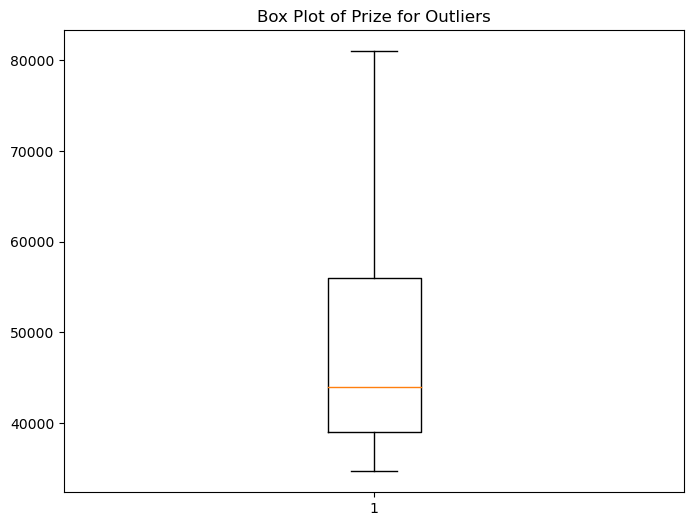

In [60]:
# Create a box plot for 'Prize' in 'outliers_df'
plt.figure(figsize=(8, 6))
plt.boxplot(outliers_df['Prize'])
plt.title('Box Plot of Prize for Outliers')
plt.show()

## Removing outliers

In [61]:
# Remove the outliers using  the Interquartile Range (IQR) method 
data = df[~((df['Prize']  < (Q1 - 1.5 * IQR)) | (df['Prize']  > (Q3 + 1.5 * IQR)))]

In [62]:
data

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0             0   23.0   159.0      64    4      6000           13   
1             1   23.0    20.0      64    4      6000           13   
2             2   37.0   149.0     128    8      5000           50   
3             3   69.0   201.0      32    2      5000            8   
4             4   12.0   130.0     128    8      5000           50   
..          ...    ...     ...     ...  ...       ...          ...   
534         633   55.0    96.0      64    4      5000           50   
535         636  104.0   119.0      64    3      5000           13   
537         638   32.0    52.0      32    2      3100            5   
538         639  123.0   259.0      64    4      5000           50   
540         642   59.0   215.0     128    4      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0               5        1          16.76         113   7299  
1               5        1          16.76         113   7299  
2              16        0          16.64          75  11999  
3               5        0          16.56          56   5649  
4               5        1          16.76          14   8999  
..            ...      ...            ...         ...    ...  
534             8        0          16.55          68   9790  
535             5        0          16.51          65   9999  
537             2        0          12.70          68   5998  
538             8        0          16.76          35   9990  
540             8        0          16.66          57  15999  

[516 rows x 12 columns]

In [63]:
# Drop the 'column_name' column
data.drop(['Unnamed: 0', 'Rear Camera',	'Front Camera'], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_3000\1759619679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Unnamed: 0', 'Rear Camera',	'Front Camera'], axis=1, inplace=True)


In [64]:
df

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0             0   23.0   159.0      64    4      6000           13   
1             1   23.0    20.0      64    4      6000           13   
2             2   37.0   149.0     128    8      5000           50   
3             3   69.0   201.0      32    2      5000            8   
4             4   12.0   130.0     128    8      5000           50   
..          ...    ...     ...     ...  ...       ...          ...   
536         637  118.0    49.0     256    8      3900           50   
537         638   32.0    52.0      32    2      3100            5   
538         639  123.0   259.0      64    4      5000           50   
539         641  110.0    17.0     128    8      5000           50   
540         642   59.0   215.0     128    4      5000           50   

     Front Camera  AI Lens  Mobile Height  Processor_  Prize  
0               5        1          16.76         113   7299  
1               5        1          16.76         113   7299  
2              16        0          16.64          75  11999  
3               5        0          16.56          56   5649  
4               5        1          16.76          14   8999  
..            ...      ...            ...         ...    ...  
536            12        0          15.49          89  79999  
537             2        0          12.70          68   5998  
538             8        0          16.76          35   9990  
539            32        0          16.26          11  38999  
540             8        0          16.66          57  15999  

[541 rows x 12 columns]

In [65]:

df.to_csv('data_for_tableau.csv')

## Dimensionality reduction

### Feature Selection:
Filter Methods (Chi-Squared Test):

In [66]:
# Load the dataset
data = load_iris()
X = data.data
y = data.target

In [67]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#  Apply feature selection (e.g., chi-squared) 
selector = SelectKBest(score_func=f_classif, k=2)  # You can choose a different scoring function and value of k
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [69]:
selector

SelectKBest(k=2)

In [70]:
# Train a model on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

In [71]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


# Feature extraction using Principal Component Analysis (PCA):

In [72]:
# Load the dataset
data = load_iris()
X = data.data
y = data.target


In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Apply feature extraction using PCA
num_components = 2  # You can choose the number of components based on your requirement
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [75]:
pca 

PCA(n_components=2)

In [76]:
# Train a model on the extracted features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)



RandomForestClassifier(random_state=42)

In [77]:
# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


# Data Visualization

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


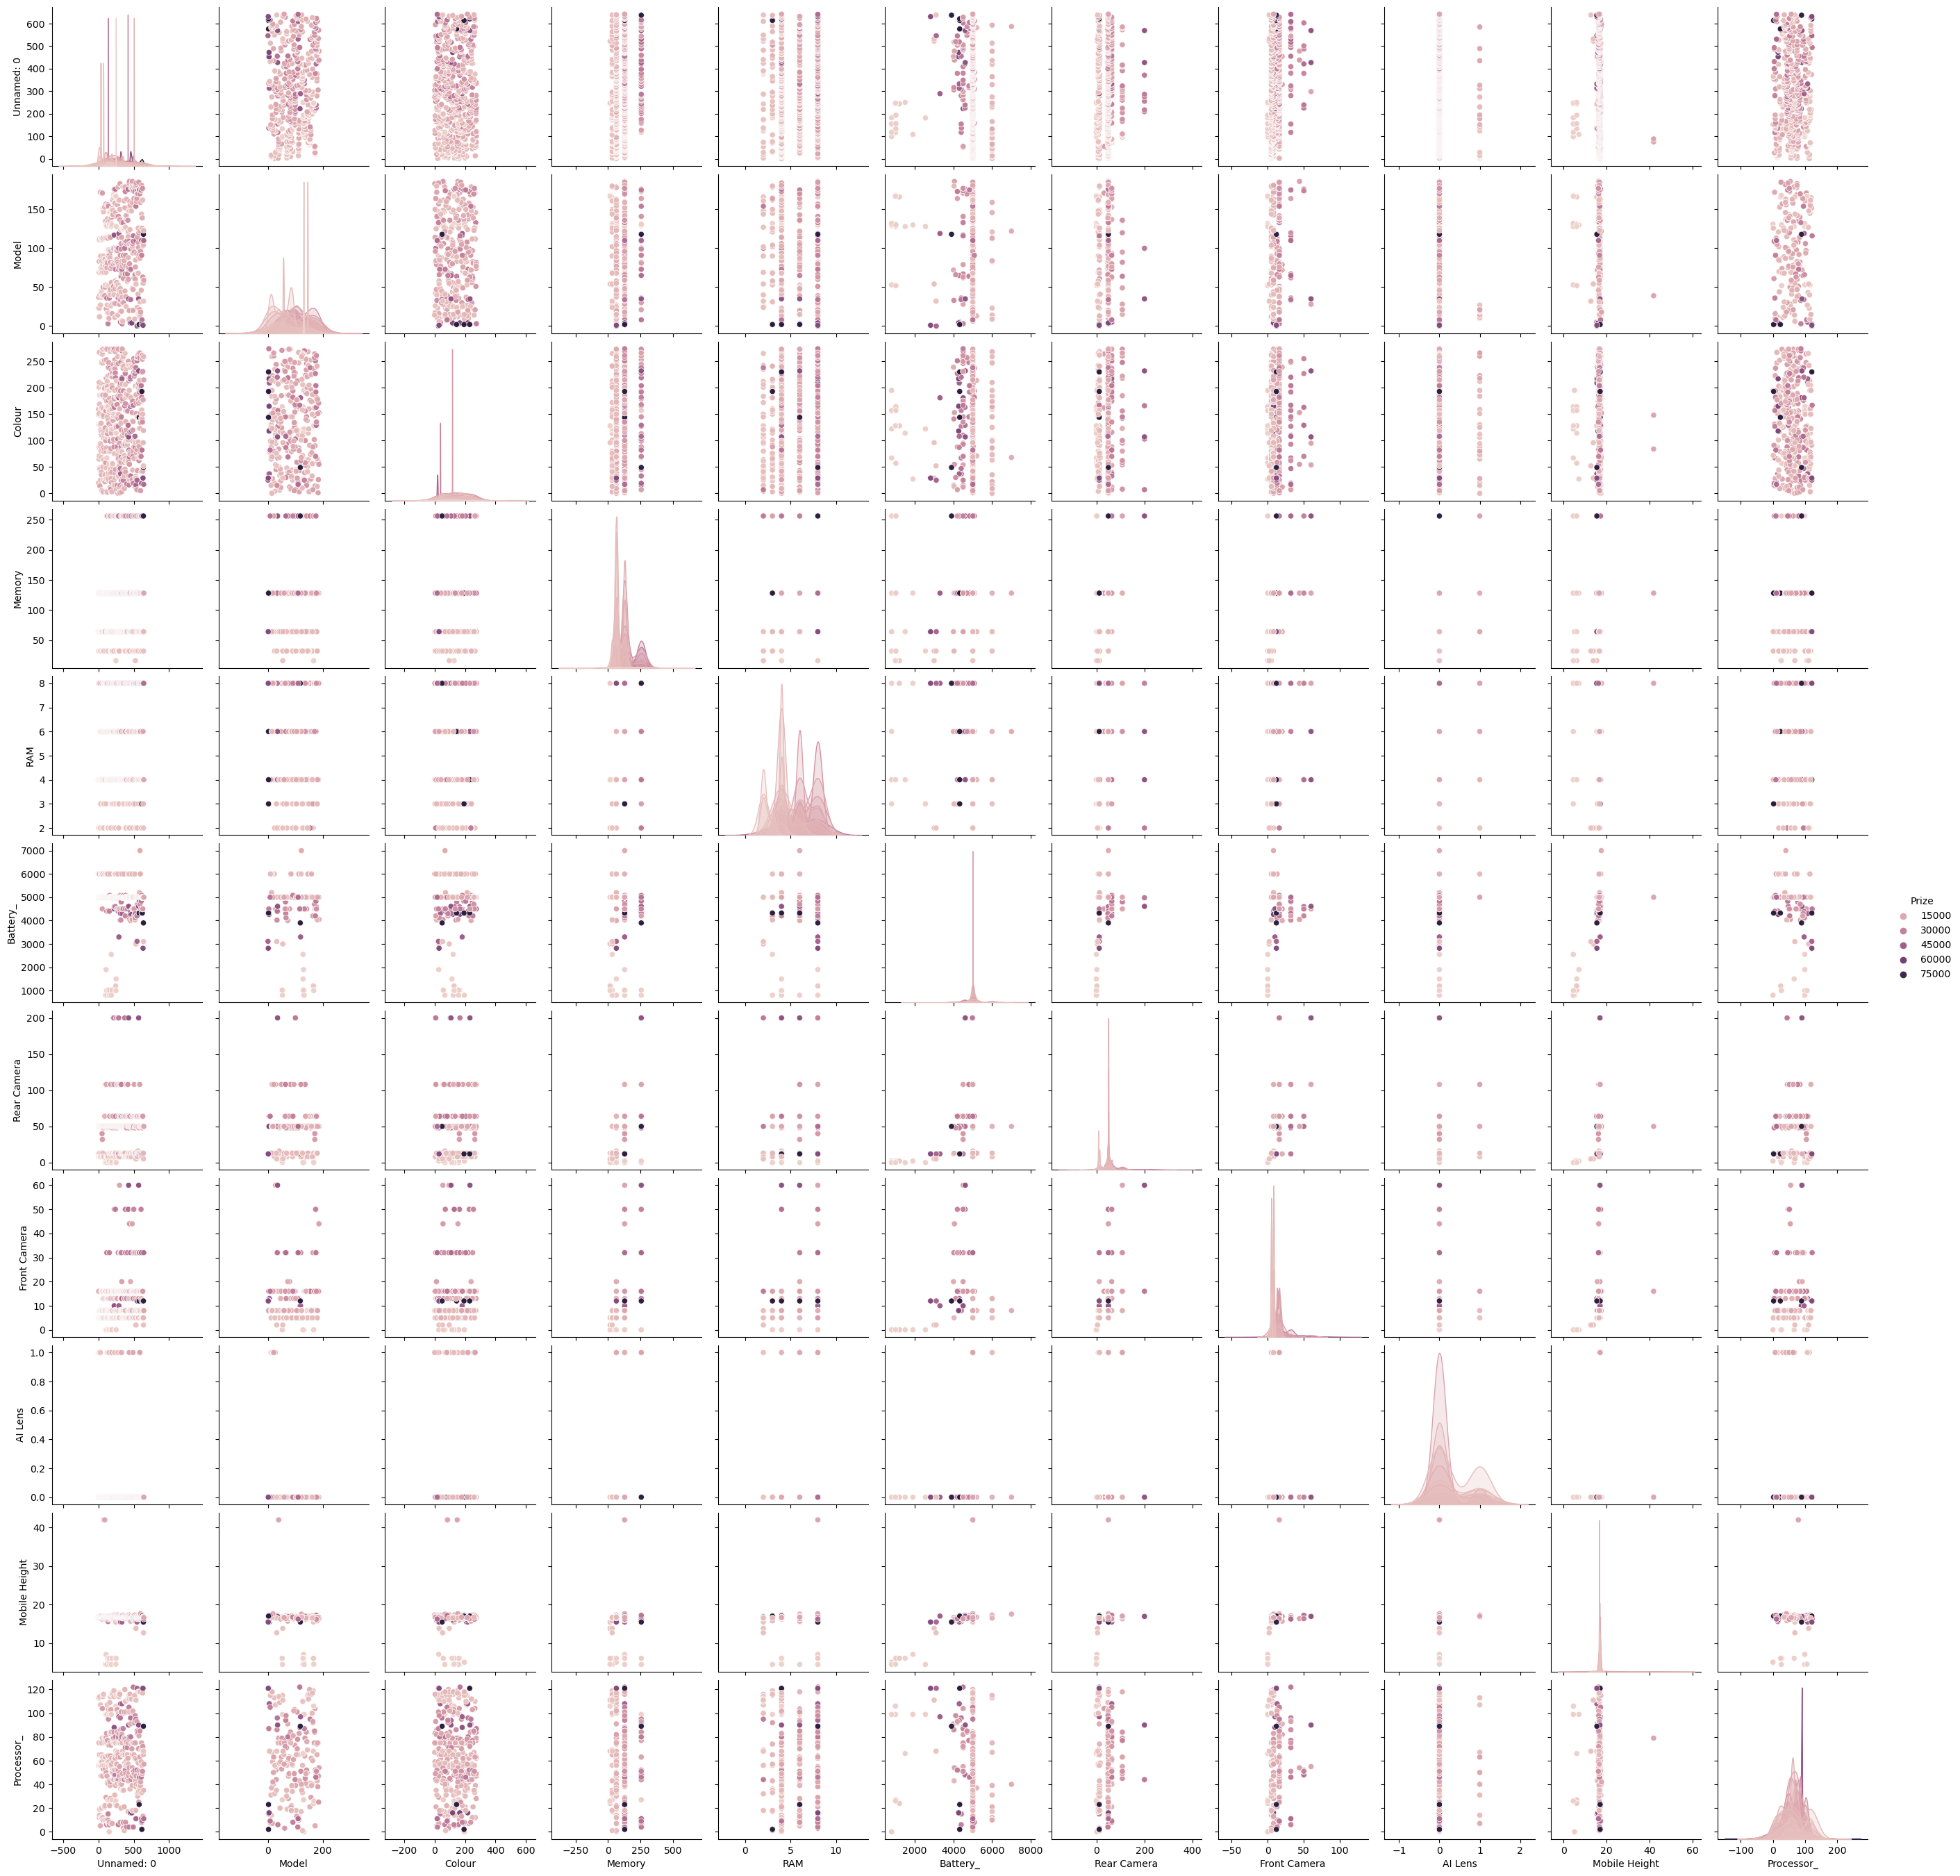

In [78]:
# Pair plot using Seaborn
sns.pairplot(df, hue="Prize")

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


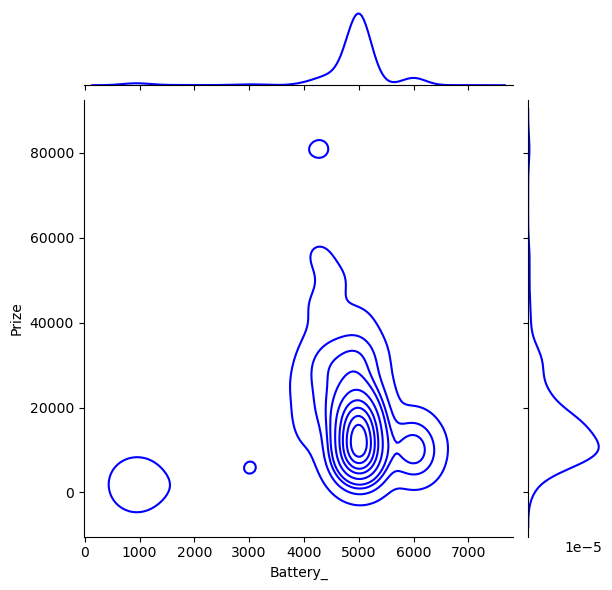

<Figure size 800x800 with 0 Axes>

In [79]:
# create a joint plot
# Create a joint plot
sns.jointplot(x="Battery_", y="Prize", data=df, color="blue", edgecolor='red', kind="kde")
plt.figure(figsize=(8, 8))
plt.show()

In [80]:
# Joint plot of battery show the 5000mh is highest in demand which incease the price

<Axes: xlabel='Prize', ylabel='Memory'>

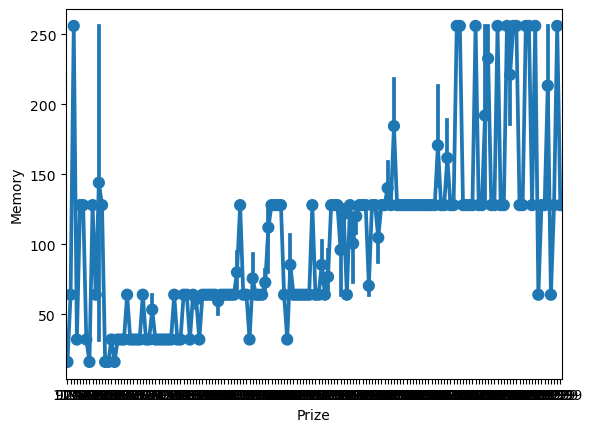

In [81]:
# create point plot
sns.pointplot(y = 'Memory', x = 'Prize', data = df)

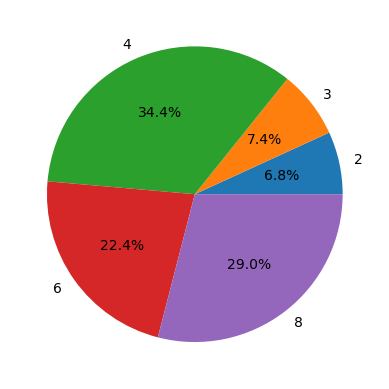

In [82]:
df.groupby('RAM').size().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [83]:
# Pie plot shows RAM 4 as highest in demand as compareto RAM 6 & RAM 8

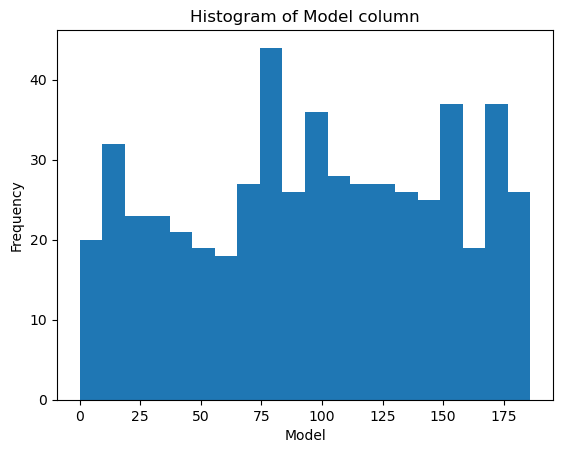

In [84]:
# Plot a histogram of the 'Processor_' column
plt.hist(df['Model'], bins=20)
plt.title('Histogram of Model column')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.show()

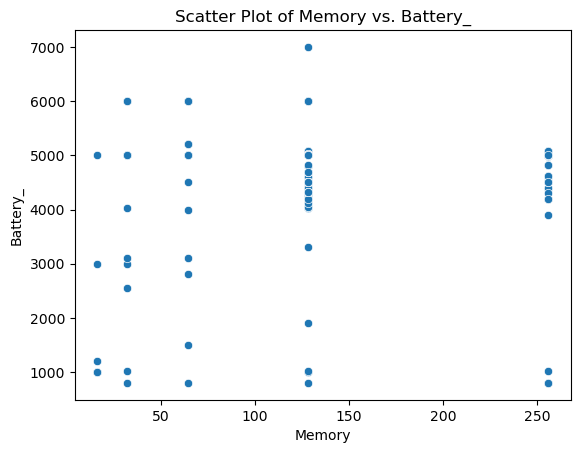

In [85]:
# Explore relationshoip between variables 
# scatter plot:
sns.scatterplot(x='Memory', y='Battery_', data=df)
plt.title('Scatter Plot of Memory vs. Battery_')
plt.show()

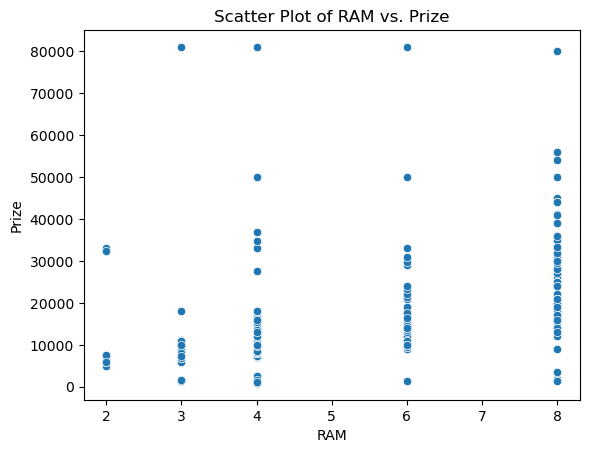

In [86]:
# Explore relationshoip between variables 
# scatter plot:
sns.scatterplot(x='RAM', y='Prize', data=df)
plt.title('Scatter Plot of RAM vs. Prize')
plt.show()



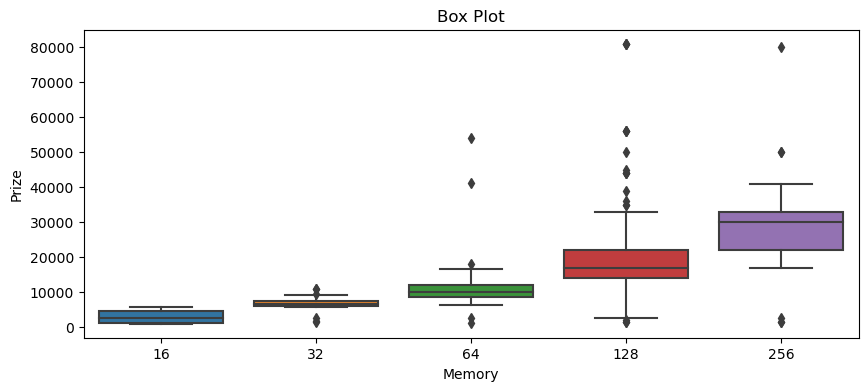

In [87]:
# Create a box plot
plt.figure(figsize = (10,4), dpi =100)
sns.boxplot( x='Memory', y='Prize', data=df)
plt.title('Box Plot')
plt.show()

In [88]:
# Box plot shows the maximum demand and increase in price as per 256GB

In [89]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

In [90]:
correlation_matrix 

Unnamed: 0     Model    Colour    Memory       RAM  Battery_  \
Unnamed: 0       1.000000  0.053021  0.023796  0.120579  0.084103 -0.057136   
Model            0.053021  1.000000  0.106594  0.036055  0.005924 -0.090875   
Colour           0.023796  0.106594  1.000000  0.042121  0.064503  0.027350   
Memory           0.120579  0.036055  0.042121  1.000000  0.625284 -0.053210   
RAM              0.084103  0.005924  0.064503  0.625284  1.000000 -0.104923   
Battery_        -0.057136 -0.090875  0.027350 -0.053210 -0.104923  1.000000   
Rear Camera      0.036324  0.000340  0.053969  0.530615  0.439558  0.198260   
Front Camera     0.233370  0.048434  0.035167  0.496865  0.493861  0.032970   
AI Lens         -0.160373 -0.396336 -0.030308 -0.094442 -0.082622  0.150156   
Mobile Height    0.015372 -0.135728  0.016014  0.063163  0.092951  0.695641   
Processor_       0.064298  0.036362 -0.068677 -0.149665 -0.108733 -0.136305   
Prize            0.333940 -0.075163  0.038895  0.566660  0.532024 -0.034297   

               Rear Camera  Front Camera   AI Lens  Mobile Height  Processor_  \
Unnamed: 0        0.036324      0.233370 -0.160373       0.015372    0.064298   
Model             0.000340      0.048434 -0.396336      -0.135728    0.036362   
Colour            0.053969      0.035167 -0.030308       0.016014   -0.068677   
Memory            0.530615      0.496865 -0.094442       0.063163   -0.149665   
RAM               0.439558      0.493861 -0.082622       0.092951   -0.108733   
Battery_          0.198260      0.032970  0.150156       0.695641   -0.136305   
Rear Camera       1.000000      0.505378 -0.043597       0.239883   -0.099895   
Front Camera      0.505378      1.000000 -0.111779       0.208012   -0.040641   
AI Lens          -0.043597     -0.111779  1.000000       0.052018   -0.112740   
Mobile Height     0.239883      0.208012  0.052018       1.000000   -0.036817   
Processor_       -0.099895     -0.040641 -0.112740      -0.036817    1.000000   
Prize             0.410367      0.532321 -0.153691       0.176009   -0.050244   

                  Prize  
Unnamed: 0     0.333940  
Model         -0.075163  
Colour         0.038895  
Memory         0.566660  
RAM            0.532024  
Battery_      -0.034297  
Rear Camera    0.410367  
Front Camera   0.532321  
AI Lens       -0.153691  
Mobile Height  0.176009  
Processor_    -0.050244  
Prize          1.000000

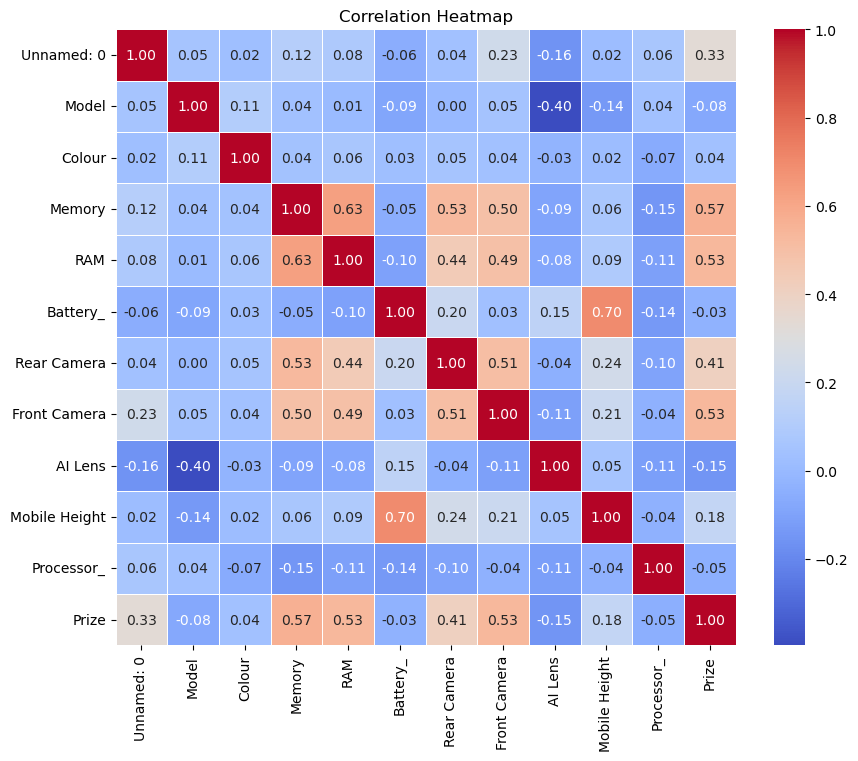

In [91]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# feature selection


In [92]:
x = df.drop('Prize', axis = 1)

In [93]:
x.head()

Unnamed: 0  Model  Colour  Memory  RAM  Battery_  Rear Camera  \
0           0   23.0   159.0      64    4      6000           13   
1           1   23.0    20.0      64    4      6000           13   
2           2   37.0   149.0     128    8      5000           50   
3           3   69.0   201.0      32    2      5000            8   
4           4   12.0   130.0     128    8      5000           50   

   Front Camera  AI Lens  Mobile Height  Processor_  
0             5        1          16.76         113  
1             5        1          16.76         113  
2            16        0          16.64          75  
3             5        0          16.56          56  
4             5        1          16.76          14

In [94]:
y = df.Prize

In [95]:
y.head()

0     7299
1     7299
2    11999
3     5649
4     8999
Name: Prize, dtype: int64

### Train Test data

In [96]:
from sklearn.model_selection import train_test_split

X = df.drop('Prize', axis=1)
y = df['Prize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [97]:
print(X_train.shape)

(432, 11)


# LinearRegression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_train and y_train are your training data
model = LinearRegression()

In [99]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [100]:
model.score(X_test, y_test)

0.5036744016069441

In [101]:
# Get the coefficients and intercept
model.coef_


array([ 1.32893885e+01, -3.37852679e+01, -5.08902757e-01,  5.86900545e+01,
        1.01882830e+03, -1.86285830e+00,  6.47980784e+00,  2.22709060e+02,
       -5.09728262e+03,  5.15371265e+02,  1.92774139e+00])

In [102]:
model.intercept_


1781.612571562393

In [103]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)


In [104]:
y_train_pred

array([25950.00769834, 18018.84813464, 20787.53939662, 12491.95423385,
       10332.02300753, 16740.78239338, 12545.46063352, 16089.75406035,
        2494.68651002, 29642.63732408, 12877.33440254, 15543.54669453,
       15093.63437025,  9296.721686  , 16420.8157622 , 13676.20641755,
       17445.44179163,  2296.35486607, 11599.03934046, 19325.30469243,
        9712.07727075, 23744.68412962, 18957.76973629, 28775.56383023,
       18314.85267863, 16787.45470899, 22612.92508979, 38753.22137431,
       12968.11518175, 13285.50454017, 26621.31487905, 13658.71941072,
       22076.14238254, 21560.19874638, 14670.14708177, 11448.61411997,
       26354.72658218, 28700.9133408 , 22068.0578552 , 18072.57467264,
       19110.18031714, 13973.31694785, 23660.08112714, 23982.81911155,
        3192.18754956, 35861.61256682, 10965.08031031, 11287.79782395,
        2212.09377768, 24806.49985154, 14818.13586951,  7774.52491162,
       19954.01413822,  5814.89223625, 18930.20934288,  6797.44261045,
      

In [105]:
# Calculate the R-squared score
r2_train = r2_score(y_train, y_train_pred)


In [106]:
r2_train 

0.5027508445811021

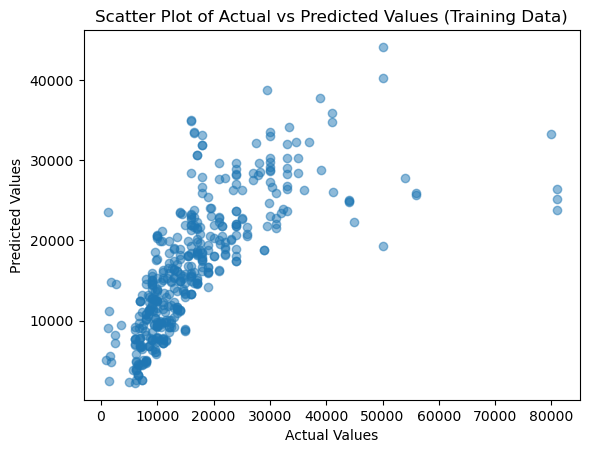

In [107]:
# Create a scatter plot
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Values (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Model Evaluation

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [109]:
# Predict on the test set
y_pred = model.predict(X_test)

In [110]:
# Assuming you have a trained model (model) and a test set (X_test, y_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4133.618436056081
Mean Squared Error (MSE): 36784716.23026082
Root Mean Squared Error (RMSE): 6065.040497000891


In [111]:
from sklearn.metrics import explained_variance_score

# Assuming y_test and y_pred are your true and predicted values
explained_var_score = explained_variance_score(y_test, y_pred)

print(f"Explained Variance Score: {explained_var_score}")

Explained Variance Score: 0.5188532303522722


In [112]:
df['Prize'].mean()

16228.375231053604

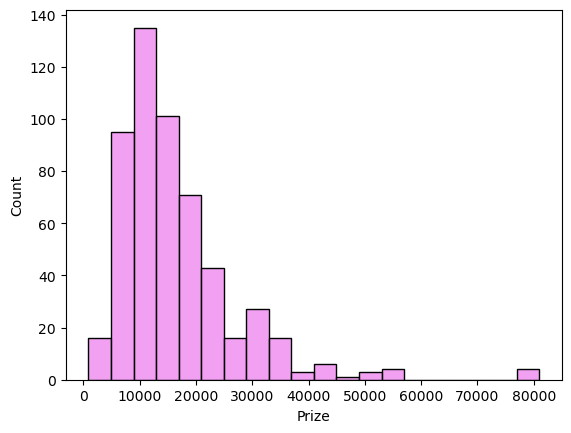

In [113]:
# Assuming df is your DataFrame and 'Prize' is the column you want to plot
sns.histplot(data=df, x='Prize', bins=20, color='violet')
plt.show()


In [114]:
# Histogram plot shows the maximum price of mobile is between 8000 to 14000.

# Errors

In [115]:
residuals = y_test - y_pred

In [116]:
residuals

225     6735.960001
18      1574.457003
48     -2241.905168
494     -921.635626
348   -14185.014168
           ...     
186     2538.644408
170     1636.640002
147     2264.806454
65      1381.823160
56      3391.213445
Name: Prize, Length: 109, dtype: float64

In [117]:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)


In [118]:
mae_test

4133.618436056081

In [119]:
mse_test 

36784716.23026082

In [120]:
rmse_test

6065.040497000891

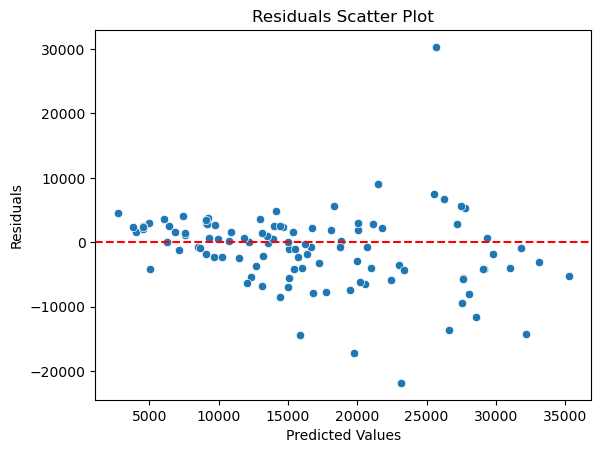

In [121]:
# Create a scatter plot of residuals
sns.scatterplot(x=y_pred, y=residuals)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')

# Show the plot
plt.show()

## We should not use Linear Regression becouse there is no clear line over the plot

C:\Users\admin\AppData\Local\Temp\ipykernel_3000\4233605569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 25, kde = True, color = 'Blue')


<Axes: xlabel='Prize', ylabel='Density'>

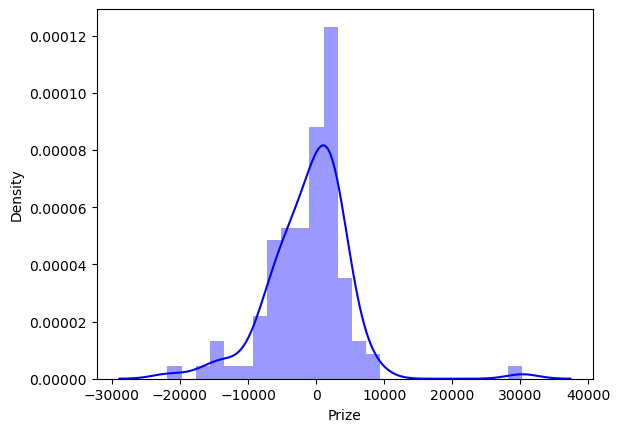

In [122]:
sns.distplot(residuals, bins = 25, kde = True, color = 'Blue')

In [123]:
# Distplot giving the proper curve for decision making

# Feature importance analysis

In [124]:
X.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_'],
      dtype='object')

In [125]:
# Create a DataFrame with coefficients
coeff_analysis = pd.DataFrame(model.coef_, index=X.columns, columns=['coeff'])

In [126]:
coeff_analysis.sort_values('coeff', ascending = False)

coeff
RAM            1018.828298
Mobile Height   515.371265
Front Camera    222.709060
Memory           58.690054
Unnamed: 0       13.289388
Rear Camera       6.479808
Processor_        1.927741
Colour           -0.508903
Battery_         -1.862858
Model           -33.785268
AI Lens       -5097.282619

### RAM, Mobile Height, Front Camera, Memory & Rear Camera  having huge impact on rise on the price of the mobile

###  Colour, Battery_, Processor_, Model & AI Lens having negetive perspective over the price of mobile

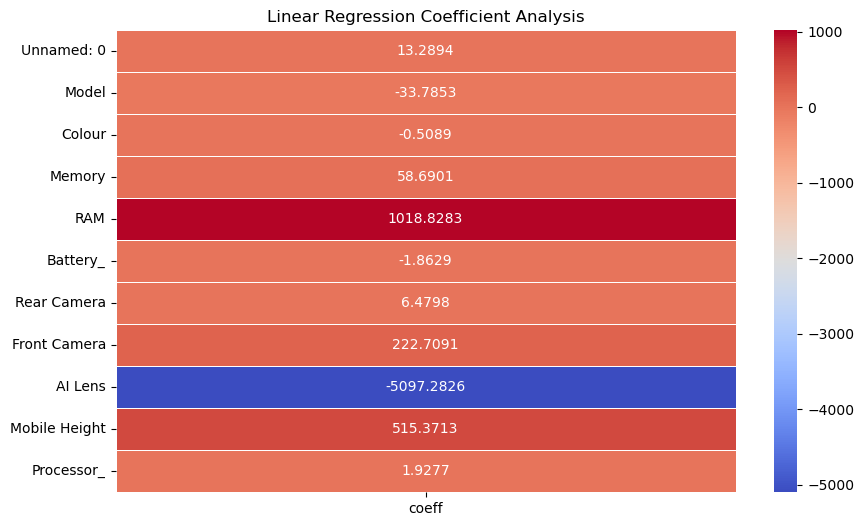

In [127]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(coeff_analysis, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Linear Regression Coefficient Analysis')
plt.show()

## Permutation Importance

In [128]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Access the permutation importance scores
perm_scores = perm_importance.importances_mean

# Print or visualize permutation importance scores
for feature, score in zip(X.columns, perm_scores):
    print(f"{feature}: {score}")


Unnamed: 0: 0.07403947045015649
Model: 0.05749814014735929
Colour: -0.0009032233382692434
Memory: 0.22409202875100878
RAM: 0.06270173167884142
Battery_: -0.04337320296026862
Rear Camera: 0.00902269868256084
Front Camera: 0.13627594462898002
AI Lens: 0.024588809385519432
Mobile Height: 0.1272596837615249
Processor_: -0.0009641254475645197


## Access Coefficients and Intercept

In [129]:
# Access coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print or visualize coefficients and intercept
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Intercept: 1781.612571562393
Unnamed: 0: 13.28938845078028
Model: -33.78526788987333
Colour: -0.5089027569074097
Memory: 58.69005447289139
RAM: 1018.8282981732505
Battery_: -1.8628583026106842
Rear Camera: 6.479807835688206
Front Camera: 222.70906002708855
AI Lens: -5097.282618665079
Mobile Height: 515.3712646749532
Processor_: 1.927741394738713


In [130]:
# Assess Feature Importance


In [131]:
# Create a list of tuples (feature, coefficient)
feature_coef_list = list(zip(X.columns, coefficients))

In [132]:
feature_coef_list

[('Unnamed: 0', 13.28938845078028),
 ('Model', -33.78526788987333),
 ('Colour', -0.5089027569074097),
 ('Memory', 58.69005447289139),
 ('RAM', 1018.8282981732505),
 ('Battery_', -1.8628583026106842),
 ('Rear Camera', 6.479807835688206),
 ('Front Camera', 222.70906002708855),
 ('AI Lens', -5097.282618665079),
 ('Mobile Height', 515.3712646749532),
 ('Processor_', 1.927741394738713)]

In [133]:
# Rank features based on absolute coefficients
ranked_features = sorted(feature_coef_list, key=lambda x: abs(x[1]), reverse=True)


In [134]:
ranked_features

[('AI Lens', -5097.282618665079),
 ('RAM', 1018.8282981732505),
 ('Mobile Height', 515.3712646749532),
 ('Front Camera', 222.70906002708855),
 ('Memory', 58.69005447289139),
 ('Model', -33.78526788987333),
 ('Unnamed: 0', 13.28938845078028),
 ('Rear Camera', 6.479807835688206),
 ('Processor_', 1.927741394738713),
 ('Battery_', -1.8628583026106842),
 ('Colour', -0.5089027569074097)]

In [135]:
# Print or visualize ranked features
for feature, coef in ranked_features:
    print(f"{feature}: {coef}")

AI Lens: -5097.282618665079
RAM: 1018.8282981732505
Mobile Height: 515.3712646749532
Front Camera: 222.70906002708855
Memory: 58.69005447289139
Model: -33.78526788987333
Unnamed: 0: 13.28938845078028
Rear Camera: 6.479807835688206
Processor_: 1.927741394738713
Battery_: -1.8628583026106842
Colour: -0.5089027569074097


In [136]:
# RAM , Mobile Height, Memory, plays the vital role  for the price decision making

# Heat map

<Axes: >

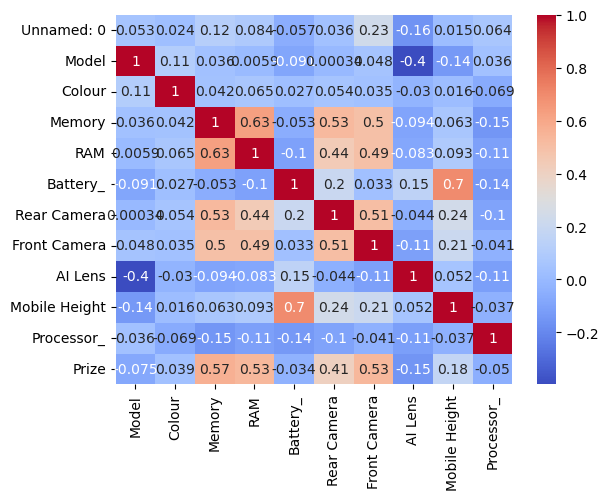

In [137]:
sns.heatmap(df.corr()[['Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_']], annot = True, cmap = 'coolwarm')

# Decision tree classifier

In [138]:
# Instantiate and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [139]:
# Evaluate the model on the test set
score = dt_model.score(X_test, y_test)


In [140]:
score 

0.5412844036697247

In [141]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [142]:
y_pred 

array([32999,  6999,  7999, 33367, 17999, 10499,  9699, 30385, 34999,
       11999, 11248,  7999, 19999, 29999, 14499, 13499, 17999, 11999,
       32999, 29999, 10999, 26999, 11999,  1299,   920, 14385,  6999,
        8999, 13999, 18999,  6199, 23999,  6599, 20999, 16999, 55999,
        7049, 23999, 22999, 10999,  9999,  8999, 16999,  9999,  7999,
       14999,  8999,  8499, 18999, 27999, 19499, 11970, 15999, 23999,
        8749, 18999, 32999, 17999, 26999,  6999,  6999, 12999,  9499,
       29999, 13999,  6299,  9499, 10499, 16499, 12499,  6799,  7299,
        9349,  6999, 27999, 14499, 18999,  8069, 26999, 12499,  7299,
        9999,  7999, 34999, 16999, 16999, 14490, 11999,  7749, 16999,
       14490, 16499, 23999, 19999,  5990, 17999, 14499, 17999,  8999,
       44999, 29999,  9699, 16499, 15999, 16999, 16999, 18999, 14490,
       12499], dtype=int64)

# Confusion Matrix & classification_report

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
feature_name = x.columns

In [145]:
feature_name

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_'],
      dtype='object')

In [146]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)


In [147]:
conf_matrix 

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [148]:
# Print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         920       1.00      1.00      1.00         1
        1299       1.00      1.00      1.00         1
        1449       0.00      0.00      0.00         1
        2499       0.00      0.00      0.00         1
        5649       0.00      0.00      0.00         1
        5799       0.00      0.00      0.00         1
        5990       0.00      0.00      0.00         0
        5998       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6199       1.00      1.00      1.00         1
        6299       1.00      0.50      0.67         2
        6599       1.00      1.00      1.00         1
        6799       0.00      0.00      0.00         0
        6978       0.00      0.00      0.00         1
        6999       0.20      1.00      0.33         1
        7049       0.00      0.00      0.00         0
        7115       0.00      0.00      0.00         1
   

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [149]:
# Access feature importances from the trained model
importances = dt_model.feature_importances_

In [150]:
importances

array([0.16711723, 0.16562815, 0.10481   , 0.04164264, 0.1032396 ,
       0.03620673, 0.07663669, 0.05658452, 0.00715049, 0.11119696,
       0.12978698])

In [151]:
dt_model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=42)>

In [152]:
# Print or visualize the feature importance scores
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Unnamed: 0: 0.16711723091023056
Model: 0.1656281458747751
Colour: 0.10481000242730888
Memory: 0.04164264118640397
RAM: 0.10323959962461104
Battery_: 0.036206733788272286
Rear Camera: 0.07663669417349149
Front Camera: 0.05658452485202395
AI Lens: 0.007150491482344037
Mobile Height: 0.1111969604970813
Processor_: 0.12978697518345744


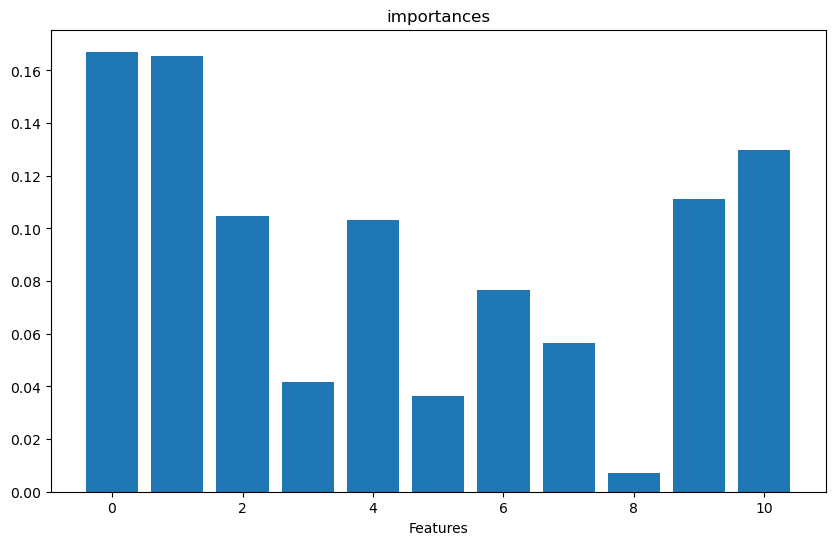

In [153]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("importances")
plt.xlabel("Features")
plt.show()

In [154]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [155]:
# Check the number of features in your data
num_features = X.shape[1]


In [156]:
num_features

11

In [157]:
# Check the number of classes in the model
num_classes = dt_model.n_classes_


In [158]:
num_classes

144

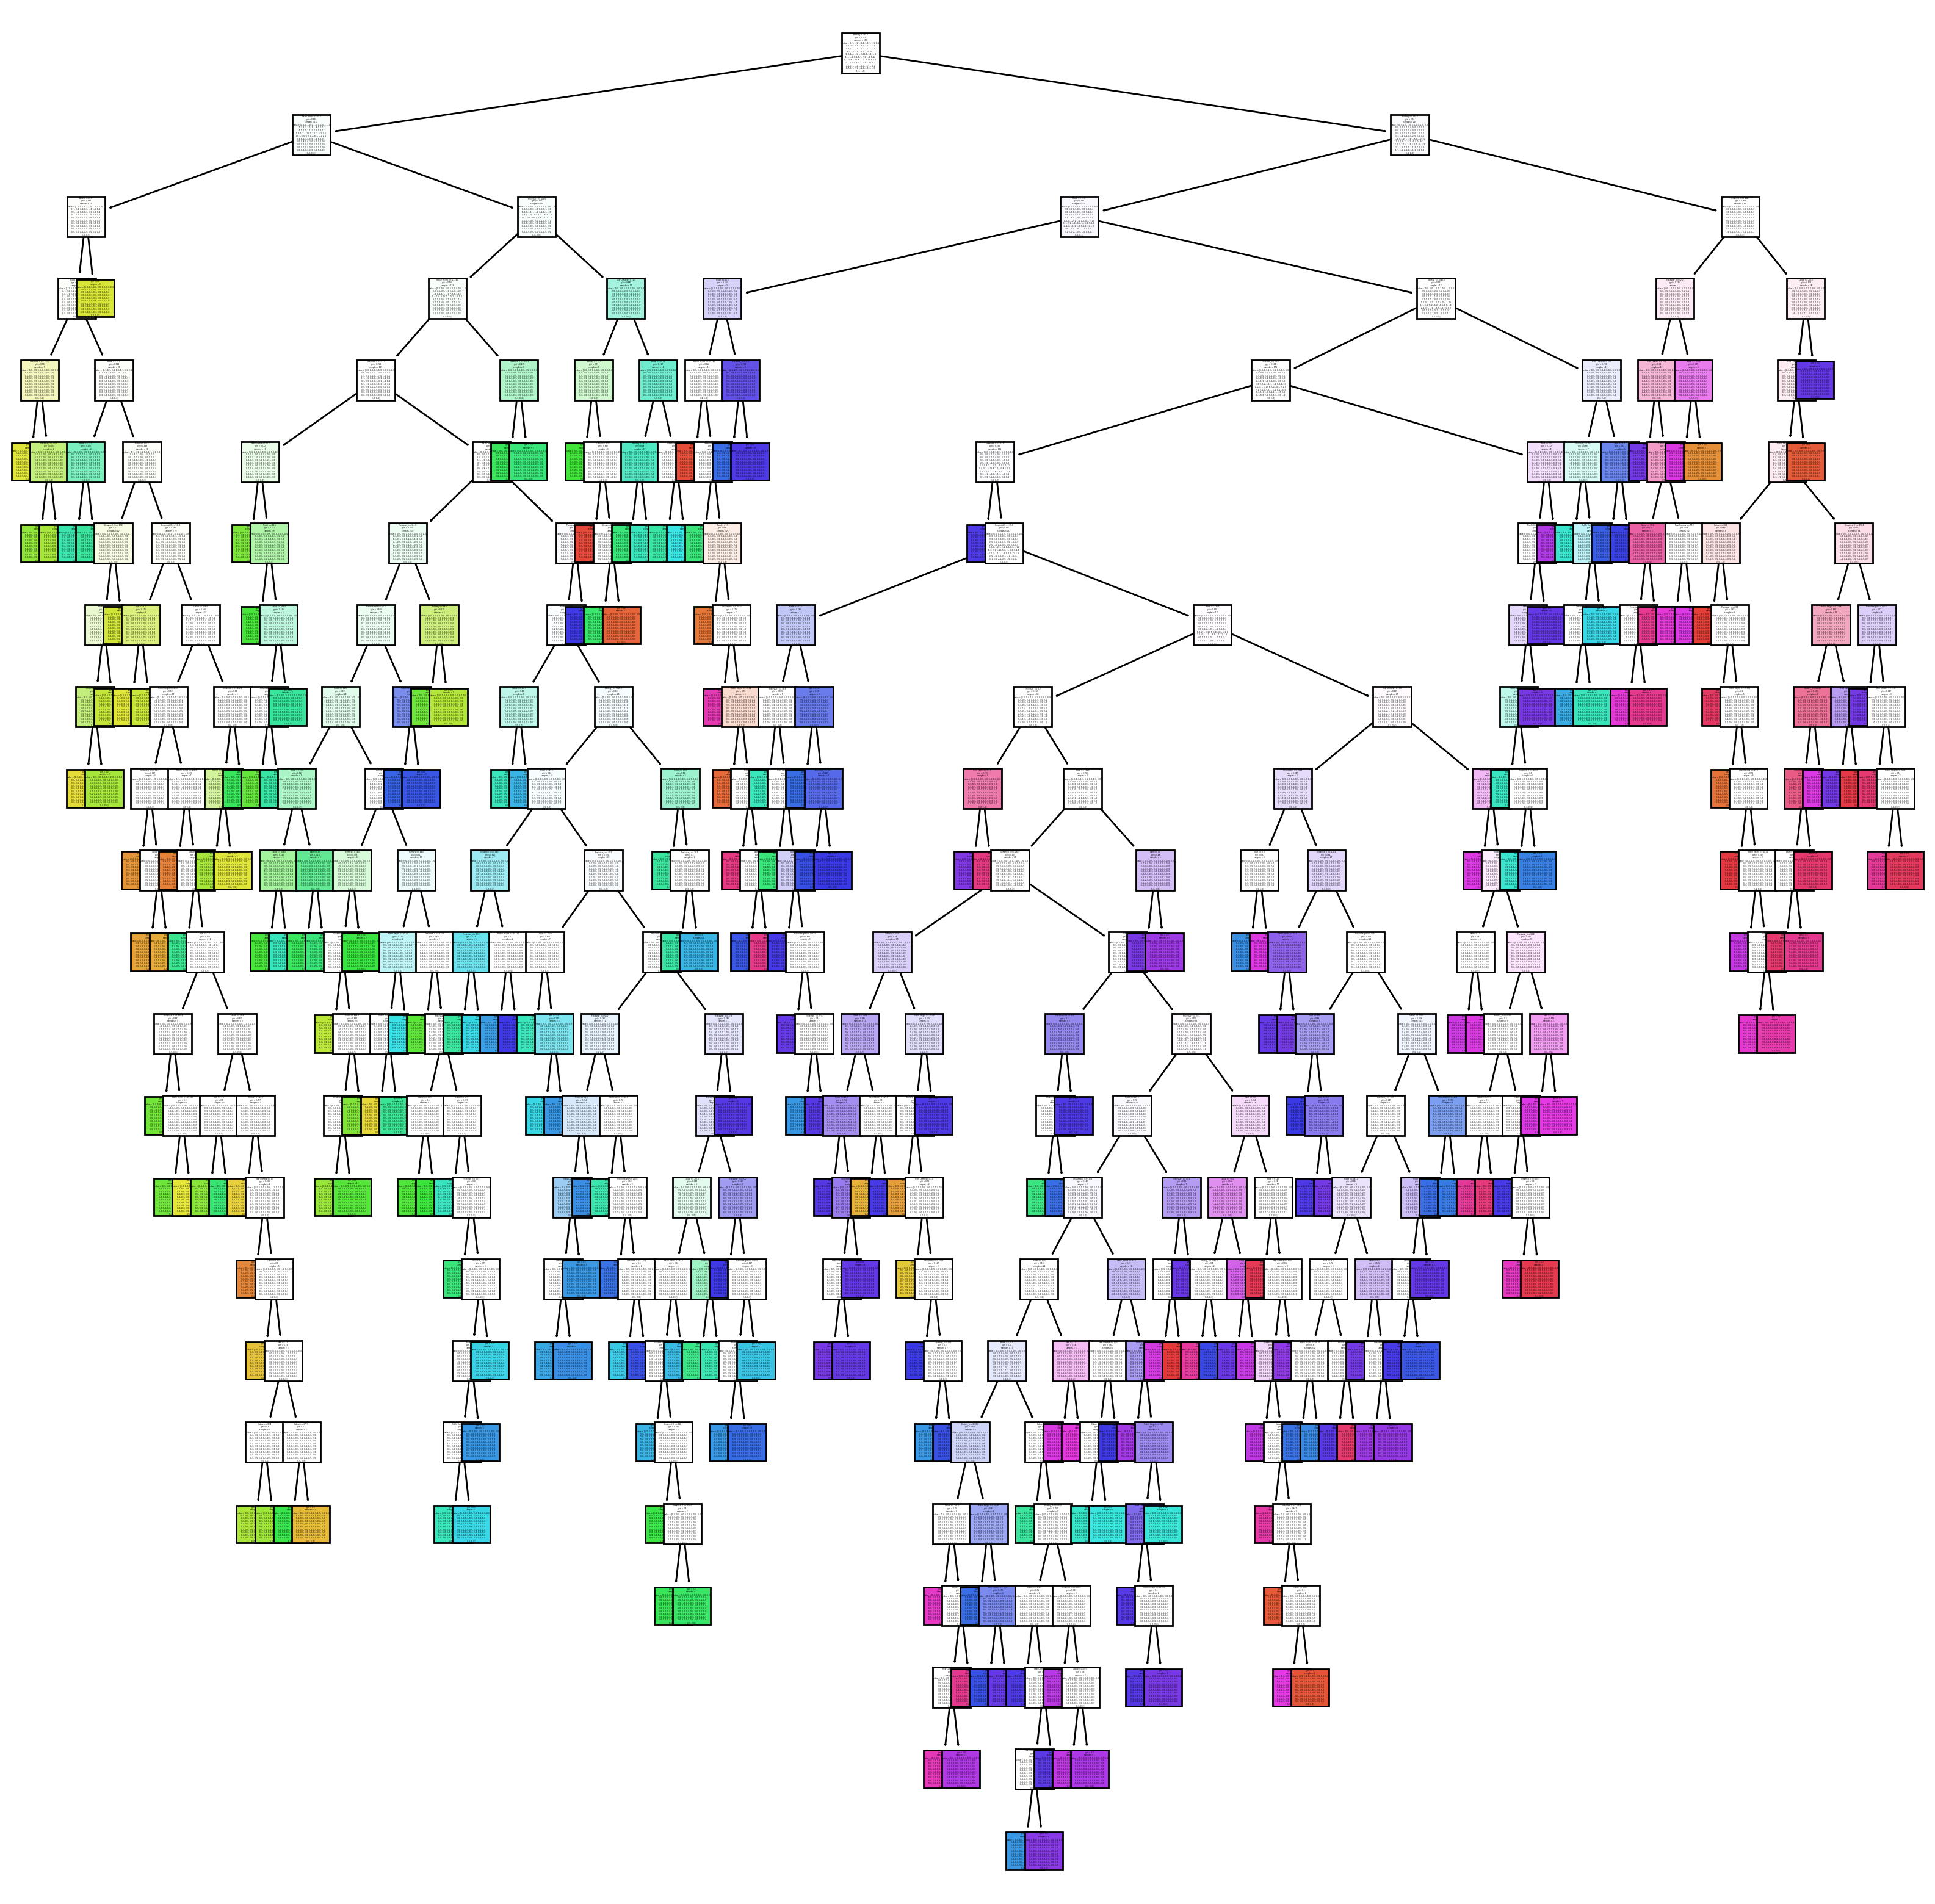

In [159]:
# Plot the decision tree
plt.figure(figsize=(20, 20), dpi=200)
plot_tree(dt_model, filled=True, feature_names=x.columns)
plt.show()


In [160]:
def report_model(dt_model):
    y_pred = dt_model.predict(x_test)
    print(classification_report(y_test, y_pred))
    print('\n')

In [161]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         920       1.00      1.00      1.00         1
        1299       1.00      1.00      1.00         1
        1449       0.00      0.00      0.00         1
        2499       0.00      0.00      0.00         1
        5649       0.00      0.00      0.00         1
        5799       0.00      0.00      0.00         1
        5990       0.00      0.00      0.00         0
        5998       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6199       1.00      1.00      1.00         1
        6299       1.00      0.50      0.67         2
        6599       1.00      1.00      1.00         1
        6799       0.00      0.00      0.00         0
        6978       0.00      0.00      0.00         1
        6999       0.20      1.00      0.33         1
        7049       0.00      0.00      0.00         0
        7115       0.00      0.00      0.00         1
        7299       1.00    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [163]:
dt_classifier = DecisionTreeClassifier(max_depth=2)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [164]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.5412844036697247


In [165]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         920       1.00      1.00      1.00         1
        1299       1.00      1.00      1.00         1
        1449       0.00      0.00      0.00         1
        2499       0.00      0.00      0.00         1
        5649       0.00      0.00      0.00         1
        5799       0.00      0.00      0.00         1
        5990       0.00      0.00      0.00         0
        5998       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6199       1.00      1.00      1.00         1
        6299       1.00      0.50      0.67         2
        6599       1.00      1.00      1.00         1
        6799       0.00      0.00      0.00         0
        6978       0.00      0.00      0.00         1
        6999       0.20      1.00      0.33         1
        7049       0.00      0.00      0.00         0
        7115       0.00      0.00      0.00         1
    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

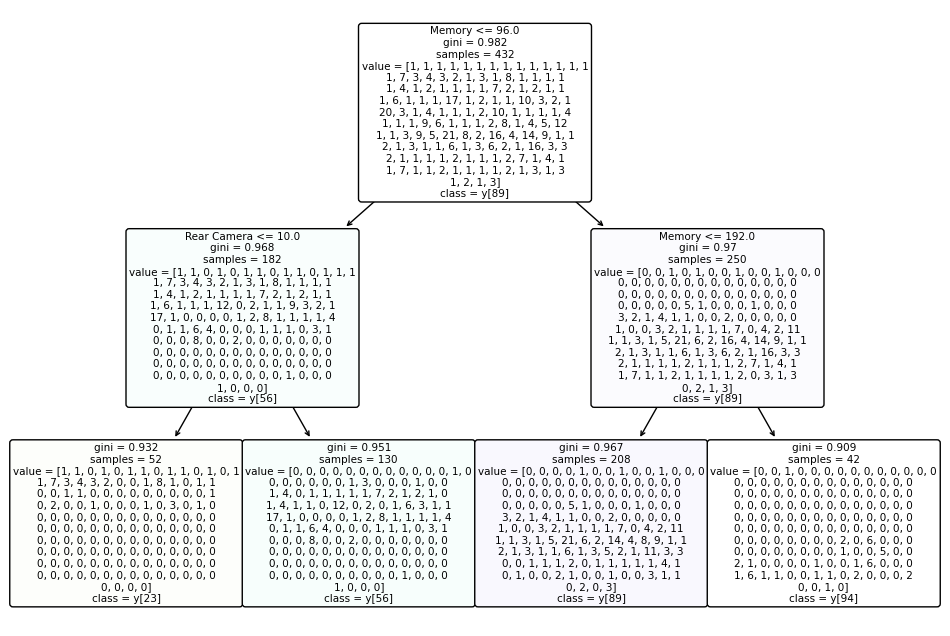

In [166]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

# Random Forest

In [167]:
# Instantiate and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

In [168]:
rf_model.score(X_train, y_train)

0.9884259259259259

In [169]:
rf_model.score(X_test, y_test)

0.5504587155963303

In [170]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


In [171]:
y_pred_rf

array([32999,  5999,  7999, 35999, 17999, 10499,  7999,  9999, 34999,
       11999, 11248,  7999, 17999, 29999, 14499, 13499, 23999, 10999,
       32999, 21999, 10999, 29999, 10999,  1299,   920, 21999,  6799,
        8999, 13999, 18999,  6199, 23999,  6599, 20999,  9499, 55999,
        7245, 23999, 22999, 10999,  9999,  8999, 15499,  9999,  7999,
       14999,  7999,  8499,  1422, 23999, 19499, 11970, 11999, 23999,
        8049, 18999, 17999, 17999, 29999,  6999,  6799, 12999,  7749,
       32999, 16999,  6299, 13490, 10499, 16499, 12499,  8999,  7299,
        5999,  6999, 27999, 15999, 12999,  8069, 16999, 12499,  6799,
       11499,  7999, 34999, 16999, 16999, 14490, 11248,  7749, 11999,
       13490, 16499, 12499, 19999,  5990, 19999, 15999,  2615,  8999,
       29499, 29999,  9699, 16499, 15999, 16999, 16999, 18999, 13490,
       11999], dtype=int64)

In [172]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

         920       1.00      1.00      1.00         1
        1299       1.00      1.00      1.00         1
        1422       0.00      0.00      0.00         0
        1449       0.00      0.00      0.00         1
        2499       0.00      0.00      0.00         1
        2615       0.00      0.00      0.00         0
        5649       0.00      0.00      0.00         1
        5799       0.00      0.00      0.00         1
        5990       0.00      0.00      0.00         0
        5998       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6199       1.00      1.00      1.00         1
        6299       1.00      0.50      0.67         2
        6599       1.00      1.00      1.00         1
        6799       0.00      0.00      0.00         0
        6978       0.00      0.00      0.00         1
        6999       0.50      1.00      0.67         1
    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [173]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [174]:
conf_matrix 

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Text(70.72222222222221, 0.5, 'True Labels')

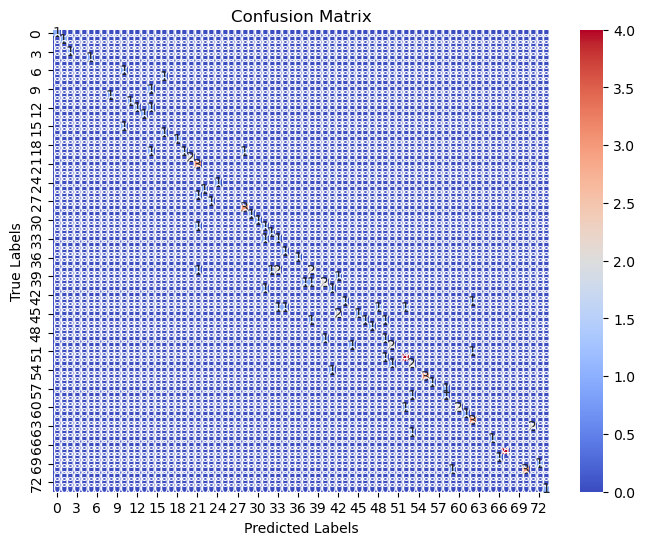

In [175]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

In [176]:
# Get feature importances
feature_importances = rf_model.feature_importances_


In [177]:
feature_importances

array([0.17619292, 0.15534084, 0.12202757, 0.04444509, 0.07727941,
       0.04297115, 0.06139137, 0.06022141, 0.01266444, 0.11158249,
       0.1358833 ])

In [178]:
feature_names = X_train.columns


In [179]:
feature_names

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_'],
      dtype='object')

In [180]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [181]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [182]:
feature_importance_df

Feature  Importance
0      Unnamed: 0    0.176193
1           Model    0.155341
10     Processor_    0.135883
2          Colour    0.122028
9   Mobile Height    0.111582
4             RAM    0.077279
6     Rear Camera    0.061391
7    Front Camera    0.060221
3          Memory    0.044445
5        Battery_    0.042971
8         AI Lens    0.012664

In [183]:
# According to random forest classifier above features directly affecting the price of mobile

# GradientBoostingClassifier and GradientBoostingRegressor

In [184]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, confusion_matrix


In [185]:
# Initialize the GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3)


In [186]:
# Fit the classifier on the training data
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [187]:
# Make predictions on the test set
y_pred_gbm_classifier = gbm_classifier.predict(X_test)

In [188]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred_gbm_classifier)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [189]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_gbm_classifier)
print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.4954128440366973


In [190]:
gbm_classifier.score(X_train, y_train)

1.0

In [191]:
gbm_classifier.score(X_test, y_test)

0.4954128440366973

In [192]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm_classifier))

Classification Report:
              precision    recall  f1-score   support

         920       0.50      1.00      0.67         1
        1299       1.00      1.00      1.00         1
        1449       0.00      0.00      0.00         1
        2499       0.00      0.00      0.00         1
        2615       0.00      0.00      0.00         0
        5649       0.00      0.00      0.00         1
        5799       0.00      0.00      0.00         1
        5998       0.00      0.00      0.00         1
        5999       0.00      0.00      0.00         1
        6199       1.00      1.00      1.00         1
        6299       1.00      0.50      0.67         2
        6599       0.50      1.00      0.67         1
        6978       0.00      0.00      0.00         1
        6999       1.00      1.00      1.00         1
        7115       0.00      0.00      0.00         1
        7245       0.00      0.00      0.00         0
        7280       0.00      0.00      0.00         0
    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [193]:
# Get feature importances
feature_importances = gbm_classifier.feature_importances_


In [194]:
feature_importances

array([0.24440747, 0.20056811, 0.08441112, 0.07081237, 0.0845197 ,
       0.02917485, 0.05720136, 0.03295333, 0.01198561, 0.05667517,
       0.12729091])

In [195]:
# Create a DataFrame with feature names and their importance scores
feature_importance_df_gbm_classifier = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [196]:
# Sort the DataFrame by importance in descending order
feature_importance_df_gbm_classifier = feature_importance_df_gbm_classifier.sort_values(by='Importance', ascending=False)

In [197]:
feature_importance_df_gbm_classifier

Feature  Importance
0      Unnamed: 0    0.244407
1           Model    0.200568
10     Processor_    0.127291
4             RAM    0.084520
2          Colour    0.084411
3          Memory    0.070812
6     Rear Camera    0.057201
9   Mobile Height    0.056675
7    Front Camera    0.032953
5        Battery_    0.029175
8         AI Lens    0.011986

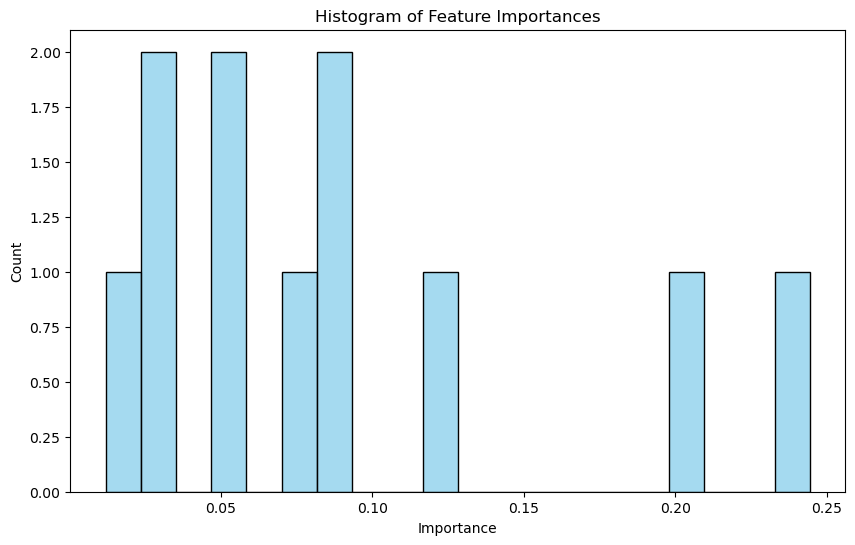

In [198]:
# Plot histogram of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(data=feature_importance_df_gbm_classifier, x='Importance', bins=20, color='skyblue')
plt.title('Histogram of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Count')
plt.show()

# GradientBoostingRegressor 

In [199]:
from sklearn.ensemble import GradientBoostingRegressor

In [200]:
# Instantiate and train the Gradient Boosting Regressor for regression
gbm_regressor = GradientBoostingRegressor(n_estimators=200, max_depth=3)
gbm_regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [201]:
# Make predictions on the test set
y_pred_gbm_regressor = gbm_regressor.predict(X_test)


In [202]:
y_pred_gbm_regressor

array([32020.06330424,  6333.53069398,  8523.95192573, 32695.3902296 ,
       20652.59719368, 10533.47677935, 11405.11232303, 16372.9045303 ,
       30945.45599175, 11771.42226648, 11478.47481188,  7623.79904211,
       20706.26411929, 28373.60213085, 12966.42703362, 13071.52202052,
       30131.14593095, 11895.9159098 , 28775.53480646, 24766.3876558 ,
       11147.74834613, 29601.73860678, 11415.33955959,  1232.44626763,
        1570.61163625, 19714.20927915,  2458.9005646 ,  9011.17669673,
       15677.07826478, 19221.39019894,  6168.7482618 , 23408.52785582,
        6511.13370106, 25021.44603282,  9676.72214589, 55844.66507331,
        6527.05063029, 21251.20747509, 22302.41380516, 14434.72804998,
       11211.32849888,  8996.76995178, 15195.4064097 ,  9862.55310709,
        8388.16677764, 13722.98175556,  8228.97434326,  8125.52564052,
        2675.1448565 , 15277.36609972, 20567.60085364, 10515.06359808,
       13435.04317324, 23535.34502876,  8558.29001316, 19299.7972897 ,
      

In [203]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_gbm_regressor)
mae

1450.6633616691138

In [204]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_gbm_regressor)
mse

5805574.101931601

In [205]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse

2409.4758977693887

In [206]:
r2_score(y_test, y_pred_gbm_regressor)

0.921667058075984

In [207]:
# Access feature importance from the trained model
feature_importance = gbm_regressor.feature_importances_


In [208]:
feature_importance

array([4.63959094e-02, 1.80488939e-01, 1.12400804e-02, 1.42093149e-01,
       2.42626165e-02, 6.46202697e-02, 2.13717659e-02, 4.57438115e-01,
       1.01058629e-04, 2.01987943e-02, 3.17893024e-02])

In [209]:
x.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height',
       'Processor_'],
      dtype='object')

In [210]:
import pandas as pd

# Assuming you have an index 'x.columns' and feature importances 'gbm_regressor.feature_importances_'
feature_importance = pd.DataFrame(index=x.columns, data=gbm_regressor.feature_importances_)

# Sort the DataFrame by the feature importances column in descending order
feature_importance_sorted = feature_importance.sort_values(by=0, ascending=False)

In [211]:
feature_importance_sorted 

0
Front Camera   0.457438
Model          0.180489
Memory         0.142093
Battery_       0.064620
Unnamed: 0     0.046396
Processor_     0.031789
RAM            0.024263
Rear Camera    0.021372
Mobile Height  0.020199
Colour         0.011240
AI Lens        0.000101

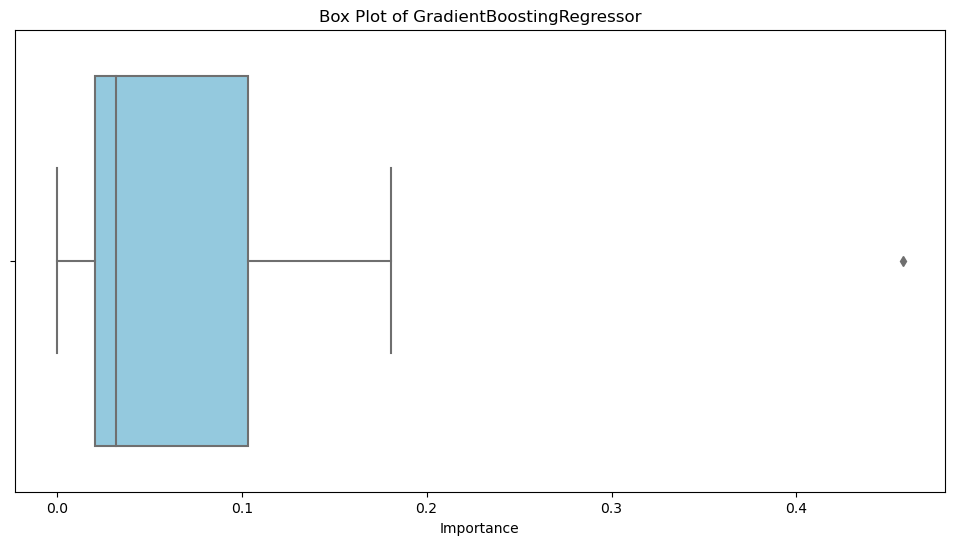

In [212]:
# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=feature_importance_sorted[0], color='skyblue')
plt.title('Box Plot of GradientBoostingRegressor')
plt.xlabel('Importance')
plt.show()

# final data testing and loading


In [213]:
import joblib

In [214]:
# Save the trained model to a file
model_filename = 'gbm_regressor_model.joblib'
joblib.dump(gbm_regressor, model_filename)

['gbm_regressor_model.joblib']

In [215]:
# Load the saved model
loaded_model = joblib.load(model_filename)


# Putting some values in all the features for testing purpose and Price determination


In [216]:
# Example test features (replace with your actual values)
#test_features = {'Model': '56','Colour': '25','Memory': 128,'RAM': 6,'Battery_': 4000,'Rear Camera': 12,'Front Camera': 8,'AI Lens': '1','Mobile Height': 150, 'Processor_': '855}

In [217]:
test_features = [[0,56, 25, 128, 6, 4000, 12, 8, 1, 150, 855]]

In [218]:
test_features

[[0, 56, 25, 128, 6, 4000, 12, 8, 1, 150, 855]]

In [219]:
loaded_model.predict(test_features)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([13767.29752705])

# Predicted price of a new mobile  came out to be 13217 which is quite near to 16228 mean price